**MIT Engenharia de Dados: Big Data**
---

**Disciplina: Infraestrutura Big Query**

---

**Professor: Leandro Maia Gonçalves**

---

**Aluno: Felipe Moreira**

###[ 1 ] Escolha 5 conceitos fundamentais sobre o Google BigQuery e os descreva

O Google Big query é um serviço de Data Warehouse da Google Cloud Platform que roda na forma de um serviço gerenciado e sem servidor. Ele possui alta velocidade de processamento e excelente desempenho na resposta de queries feitas sobre os datasets, muito por sua característica de ser um Banco de Dados Colunar. Dessa definição podem se extrai alguns pontos chave para o entendimento do que é o Google Big Query.

**Data Warehouse** - Um Data Warehouse ou um galpão de dados em tradução literal, é uma coleção de tabelas que referenciam domínios de negócio dentro de uma organização. Um exemplo de Data Warehouse seria para um serviço de ecommerce ter tabelas de produtos, de visitas ao site, de vendas, de clientes, dos retornos das ações de marketing, todos em um grande banco de dados em que essas informações pudessem ser relacionadas.

**Serviço Gerenciado** - Termo que se popularizou especialmente após a maior adoção de infraestruturas baseadas em cloud pelas empresas, os Serviços Gerenciados são serviços que estão presentes nas suites de produtos, mas que possuem o gerenciamento feito pela empresa prestadora de serviços, ou a cloud provider. Nesse sentido, imagine que você queira criar um banco de dados na nuvem, no processo não gerenciado seria necessário criar uma máquina virtual e configurar o sistema operacional dessa, instalar e manter versões do banco de dados de sua escolha etc…, com serviços gerenciados essas ações são feitas de forma transparente para o usuário, toda a manutenção é gerenciada pelo próprio provider e você pode, com baixo nível de configuração, ter o serviço desejado provisionado em sua conta. 

**Cloud Provider** - São empresas que oferecem serviços em nuvem. Exemplos são AWS, Gloud Cloud Plataform e Microsoft Azure que dispõem de diversos produtos de infraestrutura em nuvem, como serviços de armazenamento de dados, de processamento de dados, interfaces de consulta e visualização etc… Na sua maioria os serviços são cobrados por tempo de disponibilidade. Ou seja, você utiliza os servidores do Cloud Provider, e eles te cobram pelo tempo de utilização.

**Serverless** - Serverless é um modelo de desenvolvimento nativo em nuvem para criação e execução de aplicações sem o gerenciamento de servidores. Os servidores ainda são usados nesse modelo, mas eles são abstraídos do desenvolvimento de aplicações, nesse sentido a configuração do servidor sobre o qual as aplicações serão executadas é transparente ao usuário.

**Dataset Colunar** - Esse é um formato de armazenamento, inicialmente consideraod NoSql mas que hoje se incorpora ao próprio conceito de SQL. Ele basicamente armazena os dados em colunas de informações ao invés de fazê-lo por linhas de informação, o que tende a agilizar consultas quando falamos de um grande volume de dados. Caso seja feita por exemplo uma query onde a busca é por cidades= ‘São Paulo’, o formato original de consulta iria escanear toda a tabela de forma a encontrar esse valor para a coluna cidades, já a consulta feita sobre um dataset colunar avalia apenas a coluna cidades para então buscar o valor ‘São Paulo’. Isso reduz o volume de dados processados em memória e consequentemente aumenta a velocidade da consulta.


###[ 2 ] Descreva como é a arquitetura do Google BigQuery

A arquitetura do Big Query se divide em alguns elementos internos que fazem a gestão das consultas sobre os dados armazenados. Abaixo é possível verificar uma imagem que exemplifica essa interação entre os elementos internos. 

A partir de uma consulta que será recebida pela Rest API o Big Query executa a leitura dos arquivos salvos no file system através do **Dremel**. O Dremel é uma ferramenta de análise de dados no formato colunar desenhado para atuar de forma paralela em dados distribuídos. O que ele fará internamente é decompor a query recebida em decisões no formato árvore que serão submetidas aos workers distribuídos ramificação a ramificação até que se tenha o resultado final. 

Um dos diferenciais para que esse processamento seja executado de forma tão rápida é a infraestrutura de rede com a qual os workers trocam informações entre si durante o processo. Ao utilizar-se da rede **Jupiter**, o Google Big Query tem uma comunicação extremamente veloz entre as máquinas, uma vez que utiliza a largura de banda full-duplex, o que permite que as máquinas recebam e compartilhem informações simultaneamente, facilitando a gestão de estágios da consulta. 

Por fim, a leitura dos dados é feito sobre o **Colossus** que é a tecnologia responsável pelo gerenciamento distribuído de arquivos. Dessa forma uma grande quantidade de dados é salva de forma distribuída em diversos servidores, possuindo ainda uma taxa de replicação, o Colossus é também um sistema escalável, podendo adicionar novos servidores a partir do crescimento do volume de dados armazenados.

Todos esses serviços são gerenciados pelo **Borg**, que é o gerenciador de capacidade computacional do Google Big Query, é partir dele que os cluster são alocados para as tarefas necessárias e redistribuídos em caso de falhas para que a tarefa seja concluída. 

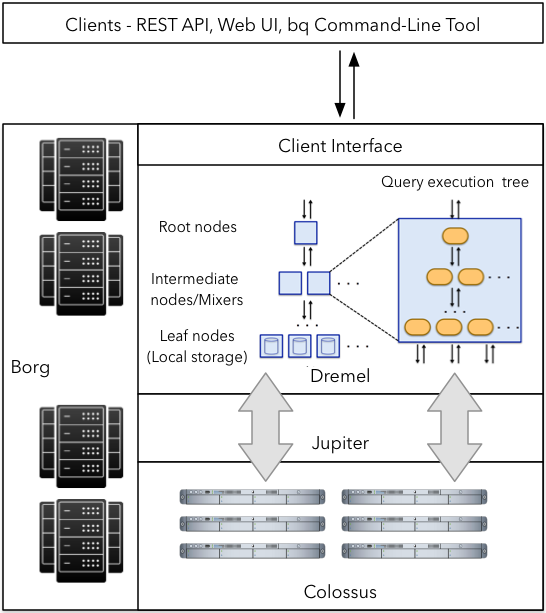

###[ 3 ] Apresente exemplos de utilização do Google BigQuery em bases NoSQL e SQL



O Google Big Query possui na sua estrutura o SQL como formato padrão de utilização, sendo possível portanto salvar no banco de dados tabelas com schema bem definido e cuja a leitura linha a linha seja complementar. Os casos de uso para esse cenário são os mesmos que para a própria utilização de um Data Warehouse, ou seja a criação de um repositório único e central de dados para a organização. Dessa forma é possível relacionar perfil de clientes com os produtos comprados, as sazonalidades dos produtos por região onde esses clientes estão inseridos, entre outros. No entanto, é sempre necessário ressaltar que para casos de uso SQL, o grande benefício do Big Query é a velocidade da consult, podendo ser muito superior a Data Warehouses.

Casos NoSql são possíveis a partir principalmente do uso de Nested Columns ou colunas aninhadas no Google Big Query, essa é uma possibilidade de centralizar informações que nem sempre serão relacionadas com toda a linha anterior ou ainda que não possuam um esquema padrão. Um exemplo é o uso de dados de Web Analytics, em que um cliente pode clicar em um produto e prosseguir para o checkout, ele pode apenas visualizar o produto ou ele pode seguir um link na página e ir para outro produto. Apenas aqui temos 3 opções em apenas uma sessão dentro de um ecommerce, como organizar essa sessão em uma tabela mantendo schema? Cada uma dessas opções precisaria estar detalhada em uma coluna mas caso uma nova opção fosse incluída, uma nova coluna deveria ser adicionada ou uma tabela auxiliar precisaria ser atualizada. Para evitar conflitos como esse, as colunas aninhadas permitem inserir dados com padrões diversos e agrupá-los em um mesmo conjunto de informações, como na imagem abaixo em que a sessão de um usuário (visitID) no site é descrita:

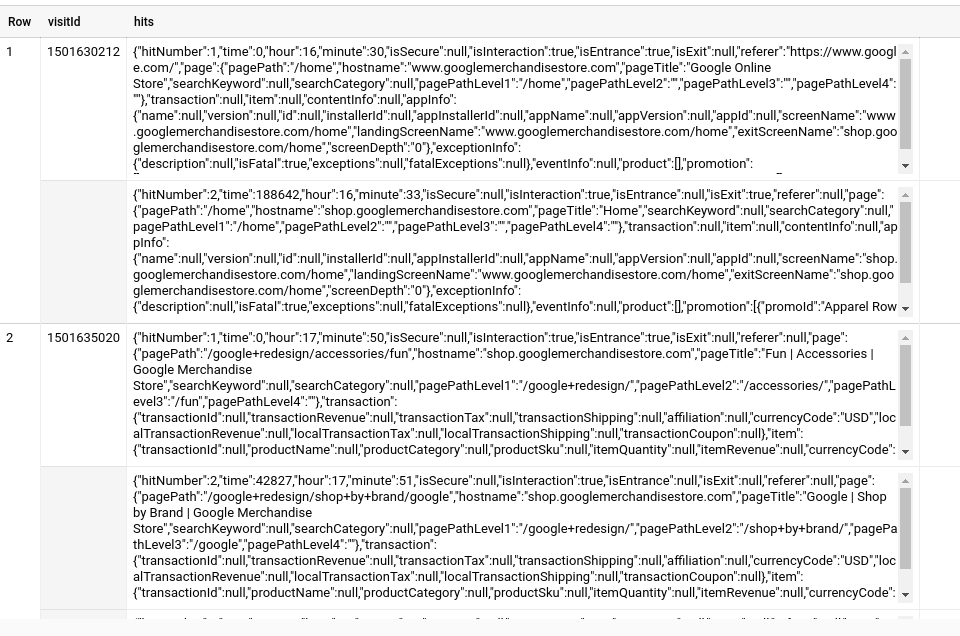

Observe que para um mesmo VisitID é possível visualizar níveis de páginas diferentes, se ele foi impactado por um banner ou não, se é a página de entrada ou não entre outras informações. Dessa forma, é possível conciliar informações NoSql com informações SQL dentro do BigQuery.

###[ 4 ] Descreva os principais benefícios em utilizar o Google BigQuery.

Os principais benefícios estão relacionados a facilidade de uso pelo usuário final, por se tratar de um serviço gerenciado com linguagem SQL-like, tanto suas configurações quanto a curva de aprendizado para o seu uso tendem a ser acelerados, encurtando o tempo até a geração de valor por meio dos dados. Além disso, a velocidade de processamento de um grande volume de dados é outra grande vantagem desse formato, sendo particularmente uma boa opção para análise de Big Data. 

Por fim, ao aliar métodos SQL e NoSql, o Google Big Query opera em dois mundos, o que tende a facilitar e muito a vida de arquitetos e engenheiros de dados, evitando a necessidade de se criar métodos “adaptados” a fim que ambos se encaixem em um único formato ou a manutenção de duas ferramentas distintas em ambientes diferentes e com dificuldade de relacionamento entre as informações.


###[ 5 ] O que é um pipeline de dados?
Um pipeline de dados é toda sequência de comandos que constroem o caminho dos dados até sua disponibilização. Compreende a captura desse dado de sistemas produtivos ou externos, o processamento desse dado afim de que possam ser cruzados com outras informações de forma consistente (sem registros nulos ou de mesma chave), o armazenamento desse dado em formatos de maior performance como data warehouses ou data lakehouses e a sua disponibilização para uso seja em análises pontuais ou em produtos de dados como dashboards, algoritmos de ciência de dados, etc…
Abaixo é possível ver um exemplo de um pipeline de dados que se utiliza de diversas ferramentas na nuvem do Google Cloud para capturar, processar e armazenar dados até sua disponibilização.

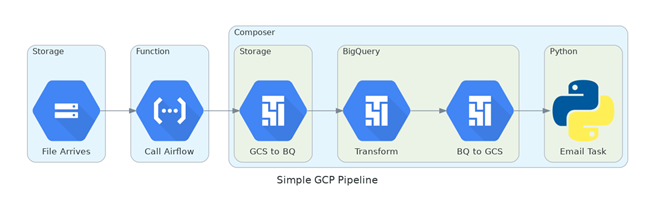


###[ 6 ] Dê 2 (dois) exemplos de aplicações onde os pipelines de dados são utilizados em seu dia-a-dia

Trabalho em uma empresa que concede empréstimos a usuários de um aplicativo. Toda a movimentação de informações até a resposta para a solicitação do cliente é feita por um pipeline de dados. Em um primeiro momento nós extraímos dados de birôs de informações como Serasa, SPC e mesmo instituições de combate ao terrorismo e lavagem de dinheiro como a Interpol. Na sequência esses dados são tratados de forma que possam ser cruzados entre si, nessa etapa um mesmo registro na tabela A deve ter sua correspondência clara na tabela B por exemplo, e não devem haver duplicidade entre as tabelas. Por fim, os dados são cruzados e um grande repositório de informações sobre os clientes é formado, esse é o repositório consultado pela aplicação de solicitação de empréstimos.

Um segundo exemplo é o de um email que recebi recentemente, dizendo que já faziam 30 dias que não comprava em uma determinada loja online e que havia portanto uma oferta para mim. Refletindo sobre, pude compreender que para receber aquele email, foi realizada primeiramente uma extração da base de compras, um agrupamento cliente a cliente pela data máxima das compras e por fim um gatilho com a condicional de que a data máxima fosse de 30 dias foi disparado. O que também representa um pipeline de dados, com extração, tratamento, provavelmente a entrada em uma ferramenta de CRM e uso através do gatilho. 


###[ 7 ] Selecione uma base de dados pública brasileira para utilizar neste exercício. Você pode baixá-la em algum formato que desejar (ex.: formato .csv). Informe onde e como você conseguiu os seus dados. Explique se são estruturados ou não estruturados. Cada linha/registro em seu banco de dados corresponde a quais informações? Cada registro possui quantas colunas associadas e quais atributos elas representam? Qual o tamanho do banco de dados escolhido?

Para essa análise, utilizaremos a base de dados da Secretaria de Educação de São Paulo, a SEDUC-SP, que anualmente realiza um desafio de dados com o intuito de compreender quais são os fatores que melhor contribuem para o melhor rendimento escolar. Para tanto, uma série de bases de dados anonimizadas foi dispnibilizada no Portal de Dados Abertos, com o intuito de responder à seguinte pergunta: "Quais as características da gestão escolar que impactam positivamente no rendimento dos estudantes no SARESP(Sistema de Avaliação de Rendimento Escolar do Estado de São Paulo)?"*
Os dados foram disponibilizados em arquivos CSV com estruturas distintas de acordo com o tema. Abaixo estarão descritos os atributos e volume de cada um dos datasets disponíveis por temática.


##### Dicionário de dados

Foram disponibilizadas algumas bases de dados e abaixo estarão descritas o que aquelas que serão utilizadas na análise contém, todas elas podem ser encontradas em https://dados.educacao.sp.gov.br/search/type/dataset:


1.   Formação por servidor = Formação funcionários anonimizado (novembro 2018 abril e novembro 2019), dentre as opções estão o grau de escolaridade funcionário a funcionário. Portanto se um determinado servidor possuir mestrado, doutorado ou bacharelado essa informação estará contida nessa base


2.   Ausências por servidor = Ausências funcionários ativos anonimizado. Aqui é possível verificar funcionário a funcionário se ele teve faltas, mesmo que justificadas no período de análise.


3.   Carga Horária por Docente = Carga horária anonimizado docentes ativos. Base com as informações das horas trabalhadas por docente. 


4.   Proeficiência SARESP por escola = O Sistema de Avaliação de Rendimento Escolar do Estado de São Paulo (SARESP) é uma avaliação anual aplicada pela Secretaria da Educação do Estado de São Paulo com a finalidade de diagnosticar e acompanhar a evolução da educação básica paulista. Aqui estarão as notas em português, matemática e ciências para o ensino médio.






#### Metodologia
  Como mencionado, para essa atividades, foram selecionadas 3 datasets que serão a base de estudo para a análise em Big Data : **Ausências, Formação e Carga Horária**. A ideia é entender de forma geral se as escolas que possuem as maiores médias de Carga Horária são também as escolas com maior nota no Saresp, se as escolas com os funcionários de maior formação são as escola com maior nota e por fim se as escolas com menor ausência estão entre as escolas que melhor performam e por fim almeja-se entender qual desses é o mais relevante nas escolas de melhor média no SARESP.


As bases podem ser encontradas no Drive: https://drive.google.com/drive/folders/1AJgKiMHeV-Xd8agllSdLMeXsdMqbZS1T?usp=sharing

###[ 8 ] Formule pelo menos 2 perguntas sobre sua base de dados. O que você quer saber sobre os dados que escolheu?



1.   Após o cruzamento dos dados de desempenho médio por escola no SARESP com dados de Ausências dos docentes, é possível dizer que as escolas com menores índices de ausências possuem as maiores notas?
2.   Após o cruzamento dos dados de desempenho médio por escola no SARESP com dados de Carga Horária por escola, é possível dizer que as escolas com maiores cargas horárias possuem as maiores notas?
1.   Após o cruzamento dos dados de desempenho médio por escola no SARESP com dados de Formação Escolar dos docentes agrupados por escola, é possível dizer que as escolas cuja a média de anos de formação dos docentes é maior, possuem as maiores notas?









###[ 9 ] Formule uma hipótese sobre o que você acha que vai encontrar quando filtrar e analisar seus dados 
A hipótese a ser testada pela análise de dados, é de que apesar de haver uma lógica permeando todas as perguntas acima, é capaz que apenas a formação do servidor possua uma clara correlação com o desempenho do aluno no exame do Saresp. Sendo a hipótese de que investir em formação dos servidores é a chave de maior aprendizado dos alunos da rede pública.


### Etapa 1 da Analise de Dados e Pré-tratamento

Aqui serão importadas as bases disponíveis no Google Drive através do mount (ou montagem) desse drive. O import será feito utilizando o pandas. Além disso, será feita a autenticação ao Big Query, afim de possibilitar a escrita e consulta de dados no Data Warehouse.

In [5]:
#Imports de bibliotecas necessárias ao processamento de dados

import pandas as pd
import seaborn as sns
from google.colab import drive
import sys, os
import datetime
import pytz


In [43]:
#Apontamento para o drive onde as bases CSV foram importadas
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Import e autenticação específicos do Big Query para que não exista sobreposição com o google drive
from google.colab import auth
from google.cloud import bigquery
auth.authenticate_user()
print('Authenticated')

Authenticated


In [45]:
#Listagem específica dos arquivos da pasta ausências
files_ausencias = os.listdir("/content/drive/My Drive/curso_big_query/arquivos_saresp/ausencias")

In [46]:
#Loop que lê e concatena os dados de ausências em um dataframe. 
all_dataset = []
counter = 0

for file in files_ausencias:
  name_file = f"/content/drive/My Drive/curso_big_query/arquivos_saresp/ausencias/{files_ausencias[counter]}"
  #Aqui filtram-se apenas as colunas necessárias para os cálculos
  schema = ['CIE-ESCOLA', 'TT-DIAS-FALTA-JUST','TT-DIAS-FALTA-INJUST', 'TT-DIAS-LIC-PREMIO', 'TT-DIAS-LIC-GESTANTE', 'TT-DIAS-LIC-ACID-TRAB', 'TT-DIAS-LIC-INTER-PARTIC']
  df_ausencias = pd.read_csv(name_file, sep=';', header = 0)
  df_ausencias = df_ausencias[schema]
  all_dataset.append(df_ausencias)
  counter = counter + 1


df_ausencias = pd.concat(all_dataset)
df_ausencias.columns = ['CIE_ESCOLA', 'TT_DIAS_FALTA_JUST','TT_DIAS_FALTA_INJUST', 'TT_DIAS_LIC_PREMIO', 'TT_DIAS_LIC_GESTANTE', 'TT_DIAS_LIC_ACID_TRAB', 'TT_DIAS_LIC_INTER_PARTIC']
df_ausencias = df_ausencias.astype(str)
    

<ipython-input-46-31df4e7fec57>:9: DtypeWarning: Columns (7,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ausencias = pd.read_csv(name_file, sep=';', header = 0)
<ipython-input-46-31df4e7fec57>:9: DtypeWarning: Columns (7,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ausencias = pd.read_csv(name_file, sep=';', header = 0)
<ipython-input-46-31df4e7fec57>:9: DtypeWarning: Columns (7,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ausencias = pd.read_csv(name_file, sep=';', header = 0)
<ipython-input-46-31df4e7fec57>:9: DtypeWarning: Columns (7,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ausencias = pd.read_csv(name_file, sep=';', header = 0)


In [47]:
#Print do tamanho da base final
df_ausencias.count()


CIE_ESCOLA                  2146486
TT_DIAS_FALTA_JUST          2146486
TT_DIAS_FALTA_INJUST        2146486
TT_DIAS_LIC_PREMIO          2146486
TT_DIAS_LIC_GESTANTE        2146486
TT_DIAS_LIC_ACID_TRAB       2146486
TT_DIAS_LIC_INTER_PARTIC    2146486
dtype: int64

In [48]:
#Listagem específica dos arquivos da pasta carga horária
files_carga_horaria = os.listdir("/content/drive/My Drive/curso_big_query/arquivos_saresp/carga_horaria")

In [68]:
#Loop que lê e concatena os dados de ausências em um dataframe. 
all_dataset = []
counter = 0

for file in files_carga_horaria:
  name_file = f"/content/drive/My Drive/curso_big_query/arquivos_saresp/carga_horaria/{files_carga_horaria[counter]}"
  #Aqui filtram-se apenas as colunas necessárias para os cálculos
  schema = ['CODESC','TOT-GERAL-AULA']
  df_cargahoraria = pd.read_csv(name_file, sep=';', header = 0, encoding="ISO-8859-1")
  df_cargahoraria = df_cargahoraria[schema]
  all_dataset.append(df_cargahoraria)
  counter = counter + 1


df_cargahoraria = pd.concat(all_dataset)
df_cargahoraria.columns  = ['CODESC','TOT_GERAL_AULA']
df_cargahoraria = df_cargahoraria.astype(str)

    


In [69]:
#Print do tamanho da base final
df_cargahoraria.count()

CODESC            9540409
TOT_GERAL_AULA    9540409
dtype: int64

In [51]:
#Listagem específica dos arquivos da pasta formação
files_formacao = os.listdir("/content/drive/My Drive/curso_big_query/arquivos_saresp/formacao")

In [82]:
#Loop que lê e concatena os dados de ausências em um dataframe. 
all_dataset = []
counter = 0

for file in files_formacao:
  name_file = f"/content/drive/My Drive/curso_big_query/arquivos_saresp/formacao/{files_formacao[counter]}"
  #Aqui filtram-se apenas as colunas necessárias para os cálculos
  schema = ["CIE-ESCOLA","FORMACAO"]
  df_formacao = pd.read_csv(name_file, sep=';', header = 0,  encoding="ISO-8859-1")
  df_formacao = df_formacao[schema]
  all_dataset.append(df_formacao)
  counter = counter + 1


df_formacao = pd.concat(all_dataset)
df_formacao.columns = ['CIE_ESCOLA','FORMACAO']
df_formacao = df_formacao.astype(str)

    



<ipython-input-82-31b8aa55460c>:9: DtypeWarning: Columns (7,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_formacao = pd.read_csv(name_file, sep=';', header = 0,  encoding="ISO-8859-1")
<ipython-input-82-31b8aa55460c>:9: DtypeWarning: Columns (7,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_formacao = pd.read_csv(name_file, sep=';', header = 0,  encoding="ISO-8859-1")


In [83]:
#Print do tamanho da base final
df_formacao.count()

CIE_ESCOLA    7136610
FORMACAO      7136610
dtype: int64

In [55]:
#Listagem específica dos arquivos da pasta de resultados do Saresp

files_saresp = os.listdir("/content/drive/My Drive/curso_big_query/arquivos_saresp/saresp")

In [56]:
#Loop que lê e concatena os dados de ausências em um dataframe. 
all_dataset = []
counter = 0

for file in files_saresp:
  name_file = f"/content/drive/My Drive/curso_big_query/arquivos_saresp/saresp/{files_saresp[counter]}"
  #Aqui filtram-se apenas as colunas necessárias para os cálculos
  schema = ['CODESC','medprof']
  df_saresp = pd.read_csv(name_file, sep=';', header = 0,  encoding="ISO-8859-1")
  df_saresp = df_saresp[schema]
  all_dataset.append(df_saresp)
  counter = counter + 1


df_saresp = pd.concat(all_dataset)
df_saresp = df_saresp.astype(str)

In [57]:
#Print do tamanho da base final
df_saresp.count()

CODESC     577293
medprof    577293
dtype: int64

###[ 11 ] Importe a sua base de dados na infraestrutura Google BigQuery. Inclua em seu relatório a forma que você realizou a importação.

Para essa tarefa, será utilizada a API do Big Query, para tanto será instanciado um cliente para o projeto criado, e todas as tabelas importadas no loop anterior serão criadas em uma camada bronze. *Mais informações sobre o esquema de dados adotado na questão 14.*

Além disso, como o schema não está sendo informado para cada envio, o dataset foi convertido para string e uma nova função de tratamento de dados string foi feita no próprio Big Query. Essa função pode ser vista abaixo e será invocada sempre que uma operação numérica for necessária.

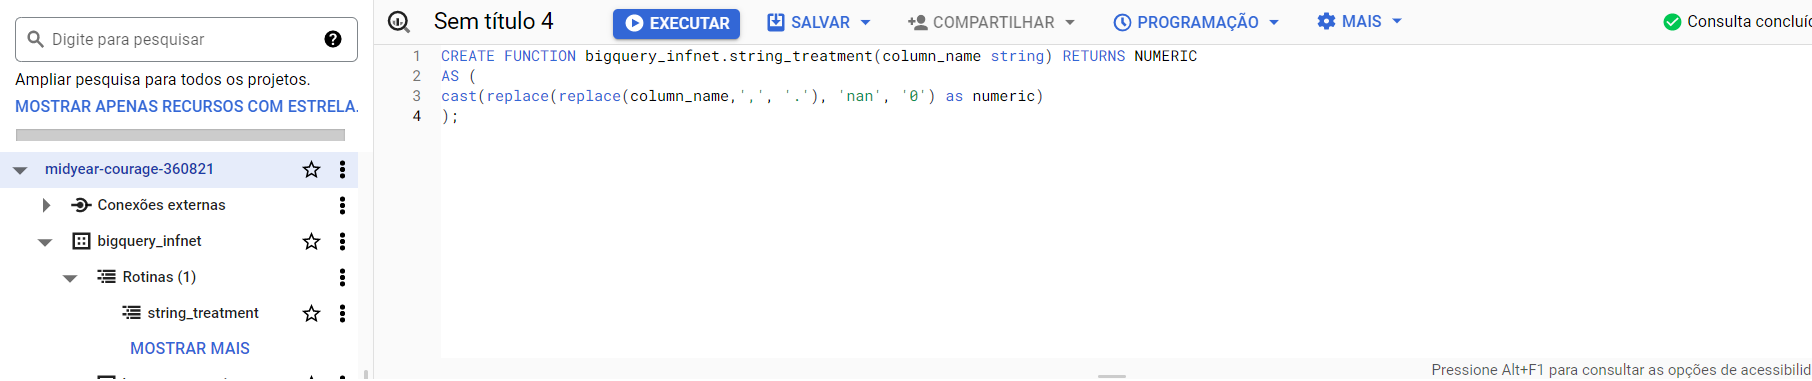

In [72]:
#escrita da camada bronze no Google Big Query
df_ausencias.to_gbq('bigquery_infnet.bronze_ausencias', project_id='midyear-courage-360821')

100%|██████████| 1/1 [00:00<00:00, 1869.95it/s]


In [73]:
#escrita da camada bronze no Google Big Query
df_cargahoraria.to_gbq('bigquery_infnet.bronze_carga_horaria', project_id='midyear-courage-360821')

100%|██████████| 1/1 [00:00<00:00, 7332.70it/s]


In [84]:
#escrita da camada bronze no Google Big Query
df_formacao.to_gbq('bigquery_infnet.bronze_formacao', project_id='midyear-courage-360821')

100%|██████████| 1/1 [00:00<00:00, 6364.65it/s]


In [75]:
#escrita da camada bronze no Google Big Query
df_saresp.to_gbq('bigquery_infnet.bronze_saresp', project_id='midyear-courage-360821')

100%|██████████| 1/1 [00:00<00:00, 5127.51it/s]


### Etapa 2 da Analise de Dados e Pré-tratamento

Pela extensão das bases fez-se necessária a escolha de um método de agrupamento que  permitisse a comparação e análise. Nesse caso, escolhemos a média como forma de reduzir  os dados. Para cada uma das tabelas foi escolhido um indicador e ao final uma média desse  indicador foi criada agrupada por escola. Todas essas análises irão gerar umo novo  dataframe de médias que servirá para a comparação ao final. O que se pretende, é que esse seja um dataframe temporário, para tanto, para todo dataframe criado é estipulada uma data de expiração, 5 horas após a sua criação.

In [3]:
#criação da instância de cliente do Big Query
client = bigquery.Client(project='midyear-courage-360821')


*   A própria média das notas do indicador SARESP: 




In [77]:
#Execução de query de média da Bronze através da instância de cliente
sql_query = ('''SELECT 	CODESC, AVG(bigquery_infnet.string_treatment(medprof)) as medprof FROM `midyear-courage-360821.bigquery_infnet.bronze_saresp` GROUP BY 	CODESC''')
df_media_saresp = client.query(sql_query).to_dataframe()
df_media_saresp.head()




,CODESC,medprof
0,12,243.857142857
1,24,206.435329341
2,36,240.835294118
3,48,242.385294118
4,59,251.855952381


In [78]:
#Salva a tabela TMP e após isso o tempo de expiração é atualizado para 5 horas
df_media_saresp = df_media_saresp.astype(str)
df_media_saresp.to_gbq('bigquery_infnet.tmp_media_saresp', project_id='midyear-courage-360821')

table = client.get_table('midyear-courage-360821.bigquery_infnet.tmp_media_saresp')

table.expires = datetime.datetime.now() + datetime.timedelta(hours=5)
client.update_table(table, ['expires'])

100%|██████████| 1/1 [00:00<00:00, 1552.87it/s]


Table(TableReference(DatasetReference('midyear-courage-360821', 'bigquery_infnet'), 'tmp_media_saresp'))

*   A média da carga horária, do maior para o menor dos professores que trabalham nas  escolas: 

In [79]:
#Execução de query de média da Bronze através da instância de cliente
sql_query = ('''SELECT 	CODESC, AVG(bigquery_infnet.string_treatment(TOT_GERAL_AULA)) as medcarga FROM `midyear-courage-360821.bigquery_infnet.bronze_carga_horaria` GROUP BY CODESC''')
df_media_cargahoraria = client.query(sql_query).to_dataframe()
df_media_cargahoraria.head()

,CODESC,medcarga
0,7316,7.224372760
1,13821,10.668803419
2,30508,8.377106046
3,918702,11.874481328
4,462767,12.893650794


In [80]:
#Salva a tabela TMP e após isso o tempo de expiração é atualizado para 5 horas
df_media_cargahoraria = df_media_cargahoraria.astype(str)
df_media_cargahoraria.to_gbq('bigquery_infnet.tmp_media_carga_horaria', project_id='midyear-courage-360821')

table = client.get_table('midyear-courage-360821.bigquery_infnet.tmp_media_carga_horaria')

table.expires = datetime.datetime.now() + datetime.timedelta(hours=5)
client.update_table(table, ['expires'])

100%|██████████| 1/1 [00:00<00:00, 7307.15it/s]


Table(TableReference(DatasetReference('midyear-courage-360821', 'bigquery_infnet'), 'tmp_media_carga_horaria'))

###[ 10 ] Crie uma nova variável a partir de outras variáveis da base de dados que te auxilie na avaliação de sua hipótese


*     A média de formação dos profissionais por escola. Aqui foi feita uma ordenação  numérica, afim de que se fosse possível obter a média sem afetar escolas com número  menor de profissionais ou sem atribuir maior nota as escolas com maior quadro de  funcionários. Para tanto foi criada uma escala de 1 a 8 em que o maior score foi atribuído a  profissionais com doutorado e o menor a profissionais com ensino fundamental. Isso foi  feito em um dataframe intermediário com o sufixo de tratamento, a partir do qual a média  será obtida:


In [85]:
sql_query = ('''
with numeric_formacao as (SELECT 
  CIE_ESCOLA, 
  CASE WHEN FORMACAO like '%DOUTORADO%' THEN 8 
      WHEN FORMACAO like '%MESTRADO%' THEN 7 
      WHEN FORMACAO like '%ESPECIALIZA%' THEN 6 
      WHEN FORMACAO like '%APERF/%' THEN 5 
      WHEN FORMACAO like '%LICENCIATURA%' THEN 4 
      WHEN FORMACAO like '%BACHARELADO%' THEN 3 
      WHEN FORMACAO like '%ENSINO M%' THEN 2 
      WHEN FORMACAO like '%ENSINO FUNDAMENTAL%' THEN 1 
      ELSE 0 
      END AS FORMACAONUM 
FROM `midyear-courage-360821.bigquery_infnet.bronze_formacao`)
SELECT CIE_ESCOLA, AVG(FORMACAONUM) as medformacao FROM numeric_formacao GROUP BY CIE_ESCOLA
''')
df_media_formacao = client.query(sql_query).to_dataframe()
df_media_formacao.head()



,CIE_ESCOLA,medformacao
0,30065,4.151170
1,8266,4.200789
2,23668,4.174433
3,25562,4.348406
4,25410,4.389555


In [86]:
df_media_formacao = df_media_formacao.astype(str)
df_media_formacao.to_gbq('bigquery_infnet.tmp_media_formacao', project_id='midyear-courage-360821')

table = client.get_table('midyear-courage-360821.bigquery_infnet.tmp_media_formacao')

table.expires = datetime.datetime.now() + datetime.timedelta(hours=5)
client.update_table(table, ['expires'])

100%|██████████| 1/1 [00:00<00:00, 5737.76it/s]


Table(TableReference(DatasetReference('midyear-courage-360821', 'bigquery_infnet'), 'tmp_media_formacao'))

*    Por fim a média das ausências é a média do total de ausências na  escola, justificadas ou não, e o objetivo é entender se escola com  menor número de ausências é também uma das escolas com maior média. Da mesma forma como no caso de formação, aqui criaremos um dataframe  intermediário com sufixo de tratamento e a partir dele a média será  obtida. 

In [87]:
sql_query = ('''with ausencias_tratamento as (SELECT 
  CIE_ESCOLA, 
    bigquery_infnet.string_treatment(TT_DIAS_FALTA_JUST) + bigquery_infnet.string_treatment(TT_DIAS_FALTA_INJUST) + 
  bigquery_infnet.string_treatment(TT_DIAS_LIC_PREMIO) + bigquery_infnet.string_treatment(TT_DIAS_LIC_GESTANTE) + bigquery_infnet.string_treatment(TT_DIAS_LIC_ACID_TRAB) + 
  bigquery_infnet.string_treatment(TT_DIAS_LIC_INTER_PARTIC) as totalausencias 
  FROM 
    `midyear-courage-360821.bigquery_infnet.bronze_ausencias`)
SELECT CIE_ESCOLA, AVG(totalausencias) as mediausencias FROM ausencias_tratamento GROUP BY CIE_ESCOLA''')
df_media_ausencias = client.query(sql_query).to_dataframe()
df_media_ausencias.head()


,CIE_ESCOLA,mediausencias
0,916024,2.690802348
1,10571,2.171806167
2,5642,3.646879756
3,5769,4.791353383
4,16421,4.905775076


In [88]:
df_media_ausencias = df_media_ausencias.astype(str)
df_media_ausencias.to_gbq('bigquery_infnet.tmp_media_ausencias', project_id='midyear-courage-360821')

table = client.get_table('midyear-courage-360821.bigquery_infnet.tmp_media_ausencias')

table.expires = datetime.datetime.now() + datetime.timedelta(hours=5)
client.update_table(table, ['expires'])

100%|██████████| 1/1 [00:00<00:00, 5974.79it/s]


Table(TableReference(DatasetReference('midyear-courage-360821', 'bigquery_infnet'), 'tmp_media_ausencias'))

###[ 12 ] Realize pré-processamento dos dados importados. Inclua eu seu relatório os códigos utilizados para o pré-processamento e criação de novas variáveis


###Passo 4 da Análise de Dados###
Com os dados reduzidos pela média o próximo passo é tornar essa média inteligível. Apesar de se tratar de uma boa redução, o valor da média nos diz muito pouco sobre como a escola está em comparação com as demais de seu estado. Dessa forma, uma nova tabela será  criada afim de se criar um ranking para cada uma das médias traçadas. Será sobre a  posição do Ranking que será feita a comparação escola a escola. As melhores posições no  ranking de um determinado indicador, são também as melhores posições no ranking de  outro? Essa tabela ordenada e com ranking por indicador será a tabela Silvar para cada um desses datasets.


In [89]:
#Faz o ranking descendente de médias no Saresp, da maior para a menor nota
sql_query = ('''
SELECT CODESC, medprof, RANK() OVER(ORDER BY bigquery_infnet.string_treatment(medprof) desc) as Ranking FROM  `midyear-courage-360821.bigquery_infnet.tmp_media_saresp` WHERE medprof is not null;
''')
df_order_saresp = client.query(sql_query).to_dataframe()
df_order_saresp.head()



,CODESC,medprof,Ranking
0,19604,283.881250000,108
1,20035,270.090000000,406
2,923382,268.101574803,468
3,20278,266.963953488,520
4,19082,264.416969697,624


In [90]:
#Salva-se a tabela ordenada como a versão Silver
df_order_saresp = df_order_saresp.astype(str)
df_order_saresp.to_gbq('bigquery_infnet.silver_saresp', project_id='midyear-courage-360821')


100%|██████████| 1/1 [00:00<00:00, 7319.90it/s]


In [91]:
#Faz o ranking ascendente de médias do número de Ausências, da menor para a maior média
sql_query = ('''
SELECT CIE_ESCOLA, mediausencias, rank() OVER(ORDER BY bigquery_infnet.string_treatment(mediausencias)) as Ranking 
FROM `midyear-courage-360821.bigquery_infnet.tmp_media_ausencias` WHERE mediausencias is not null;
''')
df_order_ausencias = client.query(sql_query).to_dataframe()
df_order_ausencias.head()



,CIE_ESCOLA,mediausencias,Ranking
0,474859,0.527210884,54
1,4963,0.641666667,75
2,19112,1.011940299,181
3,21748,1.533707865,460
4,11617,1.588454376,511


In [92]:
df_order_ausencias = df_order_ausencias.astype(str)
df_order_ausencias.to_gbq('bigquery_infnet.silver_ausencias', project_id='midyear-courage-360821')


100%|██████████| 1/1 [00:00<00:00, 5801.25it/s]


In [93]:
#Faz o ranking descendente de médias do total de Carga Horária, da maior para a menor nota
sql_query = ('''
SELECT CODESC, medcarga, rank() OVER(ORDER BY bigquery_infnet.string_treatment(medcarga) desc) as Ranking 
FROM `midyear-courage-360821.bigquery_infnet.tmp_media_carga_horaria` WHERE medcarga is not null;
''')
df_order_cargahoraria = client.query(sql_query).to_dataframe()
df_order_cargahoraria.head()



,CODESC,medcarga,Ranking
0,432660,23.655172414,149
1,924684,17.986863057,448
2,4273,17.558412932,516
3,23966,15.953091684,835
4,3931,15.916567342,846


In [94]:
#Salva-se a tabela ordenada como a versão Silver
df_order_cargahoraria = df_order_cargahoraria.astype(str)
df_order_cargahoraria.to_gbq('bigquery_infnet.silver_carga_horaria', project_id='midyear-courage-360821')


100%|██████████| 1/1 [00:00<00:00, 826.30it/s]


In [95]:
#Faz o ranking descendente de médias do valor total atribuído a formação, da maior para o menor valor
sql_query = ('''
SELECT CIE_ESCOLA, medformacao, rank() OVER(ORDER BY bigquery_infnet.string_treatment(medformacao) desc) as Ranking 
FROM `midyear-courage-360821.bigquery_infnet.tmp_media_formacao` WHERE medformacao is not null;
''')
df_order_formacao = client.query(sql_query).to_dataframe()
df_order_formacao.head()



,CIE_ESCOLA,medformacao,Ranking
0,42341,4.529914529914517,91
1,32529,4.497308209959621,125
2,911215,4.46941176470588,169
3,14874,4.450261780104708,197
4,23577,4.4325581395348825,217


In [96]:
#Salva-se a tabela ordenada como a versão Silver
df_order_formacao = df_order_formacao.astype(str)
df_order_formacao.to_gbq('bigquery_infnet.silver_formacao', project_id='midyear-courage-360821')


100%|██████████| 1/1 [00:00<00:00, 1906.50it/s]


###Passo 5 da Análise de Dados###

Com os dados já reduzidos e ordenados, resta apenas a comparação para validar as  hípoteses. Isso será feito através do join entre as tabelas. A amplitude das informações, ou  seja, o quão próximo do 1 ou do pior colocado cada valor está, será dada pelo rankng  máxmo obtido na ordenação descendente que vimos nas etapas anteriores. Essas tabelas já relacionadas com a nota do Saresp será a tabela **Gold** de cada um dos datasets.

In [107]:
#inner join do ranking de formacao e da nota final do saresp. Dataframe resultante é salvo como a versão gold da tabela
sql_query = ('''
Select a.codesc, medprof, a.Ranking , b.Ranking as Ranking_Formacao From `midyear-courage-360821.bigquery_infnet.silver_saresp` a 
inner join `midyear-courage-360821.bigquery_infnet.silver_formacao` b On a.codesc = b. CIE_ESCOLA  order by a.Ranking;
''')
df_compare_formacao = client.query(sql_query).to_dataframe()

df_compare_formacao = df_compare_formacao.astype(str)

df_compare_formacao.to_gbq('bigquery_infnet.gold_formacao', project_id='midyear-courage-360821')

df_compare_formacao.head()

100%|██████████| 1/1 [00:00<00:00, 6853.44it/s]


,codesc,medprof,Ranking,Ranking_Formacao
0,24211,331.990000000,1,3086
1,18326,307.376923077,10,279
2,47053,284.568571429,100,916
3,9106,259.008333333,1000,3725
4,267703,259.002380952,1001,1202


A análise por formação mostra que existe uma relação mas ela talvez não seja forte. As 5  primeiras escolas não estão entre primeiro e segundo quartil das escolas com maior média  de formação. 

In [108]:
#inner join do ranking de ausências e da nota final do saresp. Dataframe resultante é salvo como a versão gold da tabela
sql_query = ('''
Select a.codesc, medprof, a.Ranking , b.Ranking as Ranking_Ausencia From `midyear-courage-360821.bigquery_infnet.silver_saresp` a 
inner join `midyear-courage-360821.bigquery_infnet.silver_ausencias` b On a.codesc = b. CIE_ESCOLA  order by a.Ranking;
''')
df_compare_ausencias = client.query(sql_query).to_dataframe()

df_compare_ausencias = df_compare_ausencias.astype(str)

df_compare_ausencias.to_gbq('bigquery_infnet.gold_ausencias', project_id='midyear-courage-360821')

df_compare_ausencias.head()

100%|██████████| 1/1 [00:00<00:00, 6523.02it/s]


,codesc,medprof,Ranking,Ranking_Ausencia
0,24211,331.990000000,1,3264
1,18326,307.376923077,10,2038
2,47053,284.568571429,100,2582
3,9106,259.008333333,1000,4242
4,267703,259.002380952,1001,4662


Ao realizarmos o cruzamento e analisarmos os dados, vemos que as ausências talvez  representem um bom indicador de análise. As 3 primeiras escolas estão próximas da última colocação em ausências ou seja a menor média de faltas. Isso é uma boa relação. 

In [109]:
#inner join do ranking de carga horária e da nota final do saresp. Dataframe resultante é salvo como a versão gold da tabela
sql_query = ('''
Select a.codesc, medprof, a.Ranking , b.Ranking as Ranking_CargaHoraria From `midyear-courage-360821.bigquery_infnet.silver_saresp` a 
inner join `midyear-courage-360821.bigquery_infnet.silver_carga_horaria` b On a.codesc = b. CODESC order by a.Ranking;
''')
df_compare_carga_horaria = client.query(sql_query).to_dataframe()

df_compare_carga_horaria = df_compare_carga_horaria.astype(str)

df_compare_carga_horaria.to_gbq('bigquery_infnet.gold_carga_horaria', project_id='midyear-courage-360821')

df_compare_carga_horaria.head()

100%|██████████| 1/1 [00:00<00:00, 7584.64it/s]


,codesc,medprof,Ranking,Ranking_CargaHoraria
0,24211,331.990000000,1,4884
1,18326,307.376923077,10,869
2,47053,284.568571429,100,2291
3,9106,259.008333333,1000,2968
4,267703,259.002380952,1001,739


Essa é a relação mais fraca até agora. A maioria das escolas com melhores médias está  próxima a mediana de médias em carga horária. Não parece haver correlação

###[ 13 ] Inclua em seu relatório o código fonte necessário para definir e executar um pipeline que implemente, na ordem correta, todos os passos de pré-processamento que você escolheu para analisar sua base de dados
Todo código desenvolvido nesse notebook e seus comentários estão disponíveis nesse repositório do github: https://github.com/felipemoreia/infnet-big-query

Para a correta execução é necessário fazer o import dos arquivos contidos no google drive

Ao final do projeto a estrutura do Data Warehouse ficará como na imagem abaixo com tabelas bronze, silver e gold criadas para cada um dos grupos de informações, incluindo as tabelas tmp que possuem data de expiração definida.

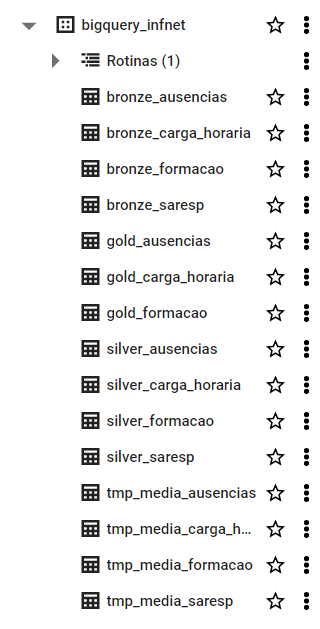

###[ 14 ] Insira em seu relatório um esquema que represente o funcionamento de seu pipeline de dados

Apesar de se tratar de uma análise ad-hoc, o esquema de tratamento de dados busca emular a arquitetura de camadas em um data lake, onde na camada bronze  tem-se a versão bruta do dado, tal como extraída da origem, na versão silver uma tabela com alguma regra de deduplicação e tratamento de dados primários nulos, e por fim a gold com tabelas composta da união de outras tabelas. Essa versão final é propícia para análises de negócios por relacionar mais de um domínio de dados ou de negócios.Por ser uma análise ad-hoc, assume-se que a agregação pela média de todas as tabelas e seu ordenamento corresponde silver e o relacionamento com as notas do saresp corresponde a gold. Tal como no esquema abaixo

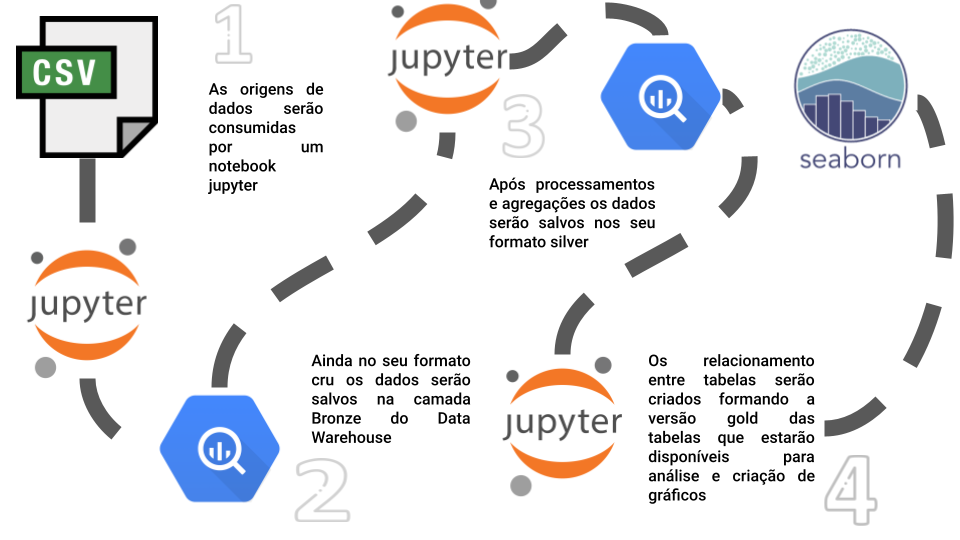

###[ 15 ] Exporte os seus dados processados em formato .csv e importe em um software de visualização. Se possível, você também pode integrar diretamente o Google BigQuery com uma ferramenta de visualização.

Uma vez que os dados foram tratados e já se encontram disponíveis enquanto Dataframes. Os gráficos serão feitos no próprio notebook utilizando ferramentas de data visualization. No entanto, segue abaixo um trecho do código que faria a exportação dos dados em CSV, afim de consumo por outras ferramentas de dados.

In [101]:
from google.colab import files

sql_query = ('''Select * from `midyear-courage-360821.bigquery_infnet.gold_ausencias`;''')
df_ausencias_export = client.query(sql_query).to_dataframe()

df_ausencias_export.to_csv("df_compare_ausencias.csv")
files.download("df_compare_ausencias.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###[ 16 ] Utilizando a ferramenta de visualização, crie gráficos (no mínimo dos gráficos, um de barras e um de dispersão) um suportem as suas conclusões com relação às hipóteses investigadas

In [7]:
#import da biblioteca de plotagem de gráficos
import seaborn as sns
import matplotlib.pyplot as plt

Inicialmente a ideia é entender se quando olhamos a distribuição das médias, temos uma distribuição normal, caso não tivessemos os dados precisariam ser tratados antes das análises futuras. No entanto, como pode-se observar na imagem abaixo, trata-se de uma distribuição normal.

<Axes: xlabel='medprof', ylabel='Count'>

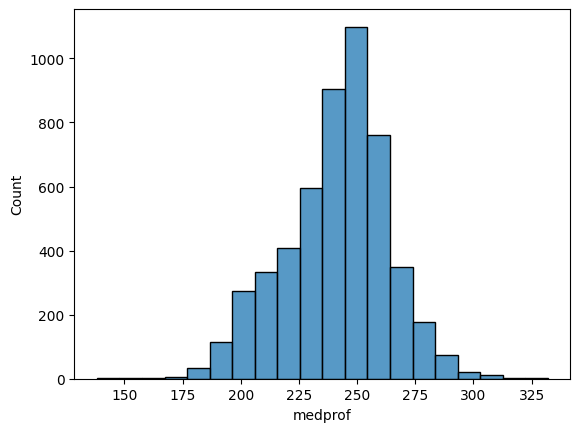

In [103]:
#Converte-se a coluna de média de notas para o valor numérico, para validar qual a distribuição das notas
sql_query = ('''Select CODESC, bigquery_infnet.string_treatment(medprof) as medprof  from `midyear-courage-360821.bigquery_infnet.silver_saresp`;''')
df_saresp_avg = client.query(sql_query).to_dataframe()

df_saresp_avg["medprof"] = pd.to_numeric(df_saresp_avg["medprof"])
sns.histplot(df_saresp_avg["medprof"], bins = 20)

Como a iniciativa pretende entender qual a relação entre as escolas de maior média no SARESP, serão selecionadas as 250 escolas com maior média e a partir delas buscarão-se padrões entre o ranking dos atributos Ausências, Carga Horária e Formação e o próprio ranking do Saresp

[Text(0.5, 1.0, 'Comparação entre os rankings de nota no Saresp e Formação')]

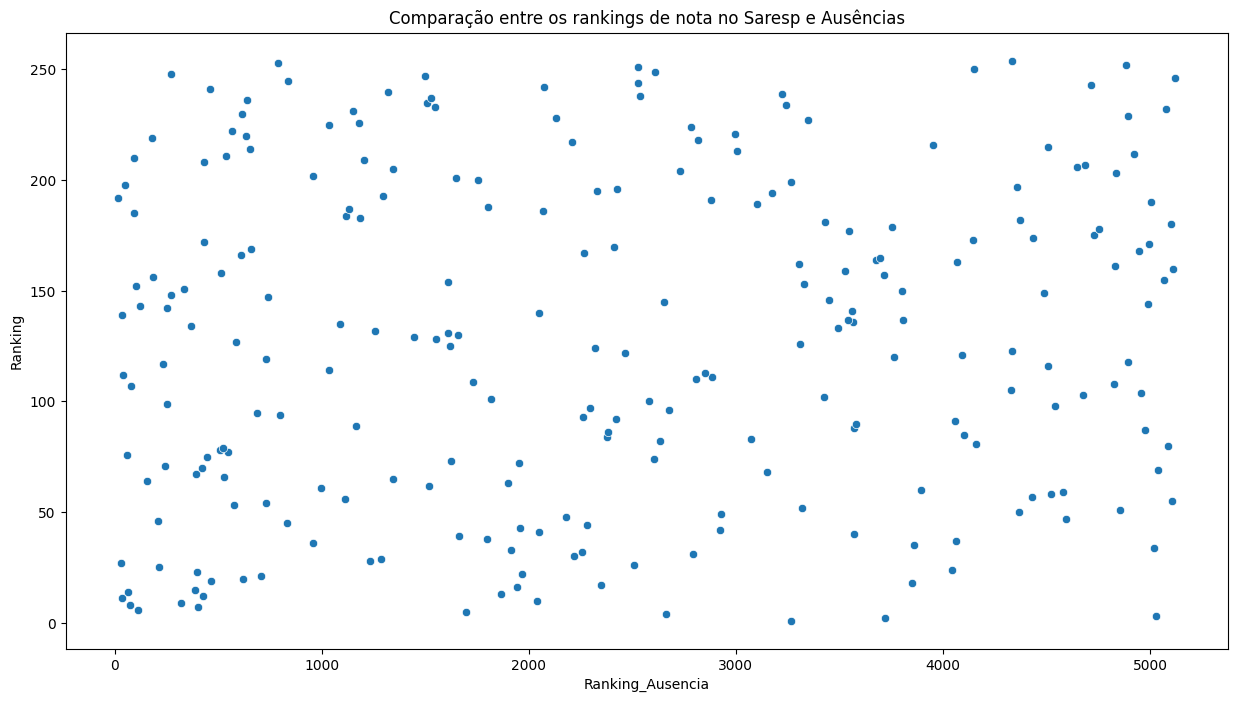

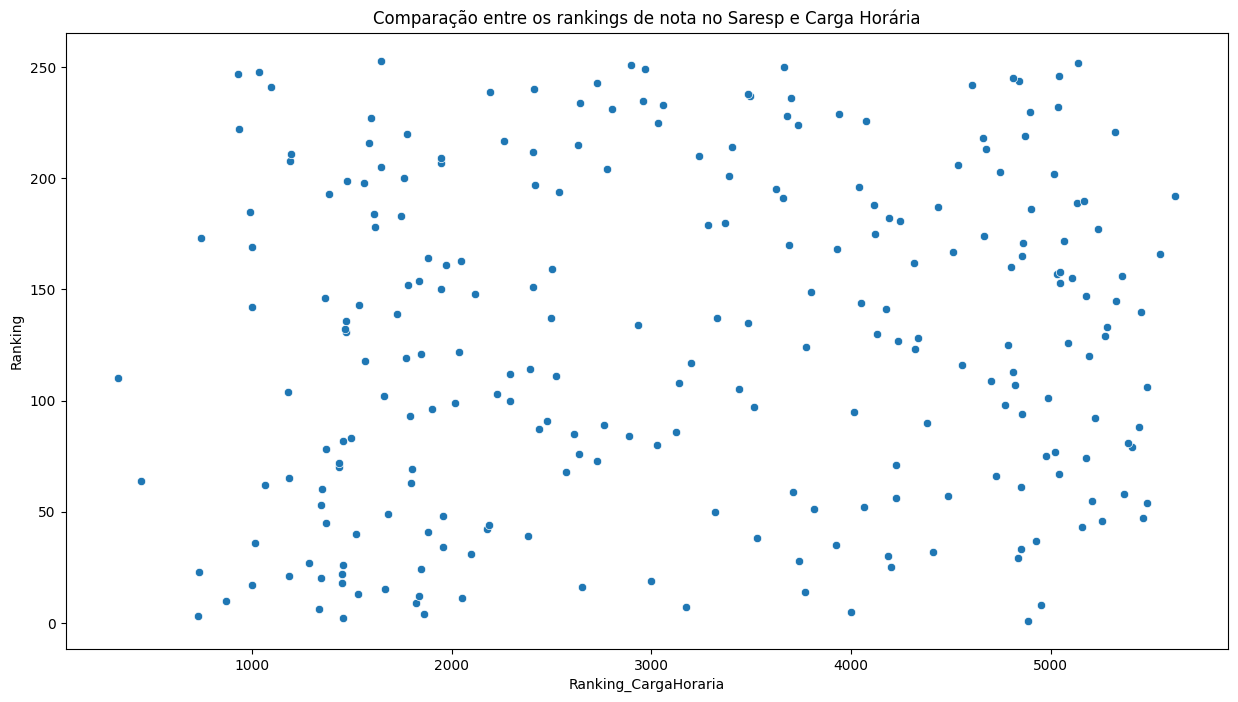

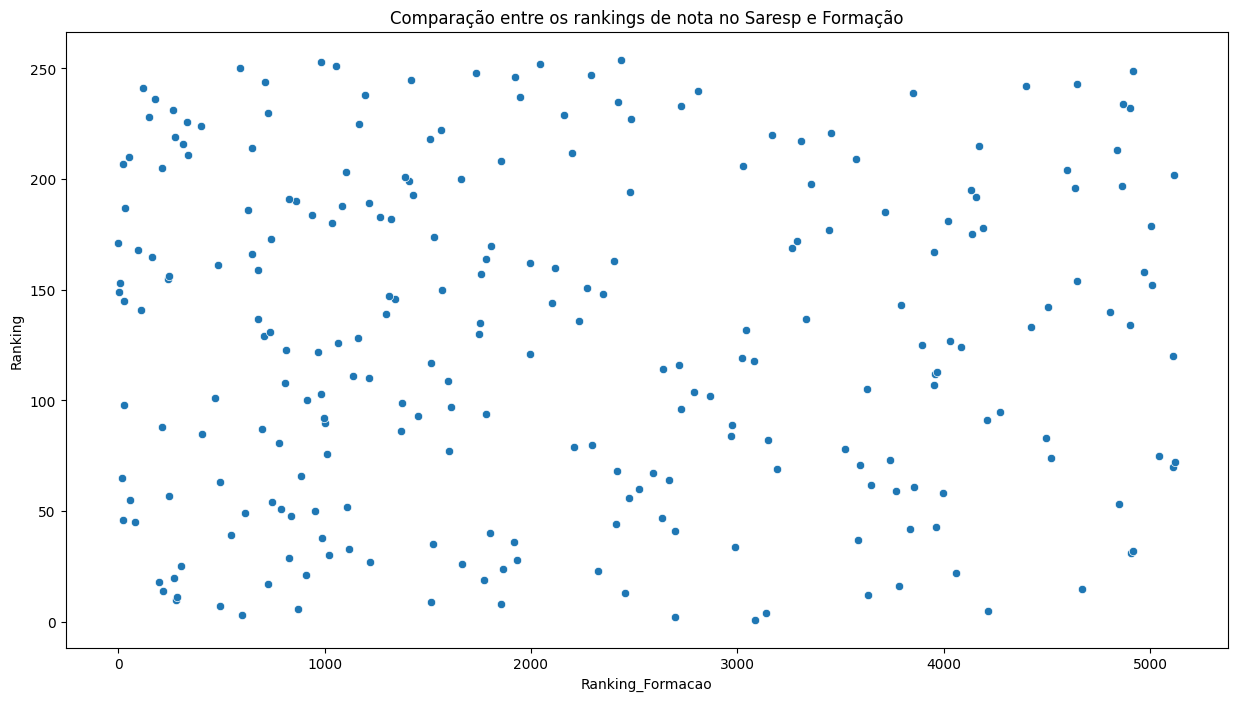

In [18]:
#Converte-se a coluna de média de faltas para o valor numérico assim como a média das notas saresp,
#para validar como elas se correlacionam
sql_query = ('''Select * from `midyear-courage-360821.bigquery_infnet.gold_ausencias` order by cast(Ranking as numeric) limit 250;''')
df_ausencias_avg = client.query(sql_query).to_dataframe()

df_ausencias_avg["Ranking"] = pd.to_numeric(df_ausencias_avg["Ranking"])
df_ausencias_avg["Ranking_Ausencia"] = pd.to_numeric(df_ausencias_avg["Ranking_Ausencia"])

df_ausencias_avg = df_ausencias_avg[["Ranking_Ausencia","Ranking"]]
plt.figure(figsize = (15, 8))
sns.scatterplot(x = df_ausencias_avg["Ranking_Ausencia"], y = df_ausencias_avg["Ranking"] ).set(title='Comparação entre os rankings de nota no Saresp e Ausências')

#Converte-se a coluna de média de horas-aula para o valor numérico assim como a média das notas saresp,
#para validar como elas se correlacionam
sql_query = ('''Select * from  `midyear-courage-360821.bigquery_infnet.gold_carga_horaria` order by cast(Ranking as numeric) limit 250;''')
df_carga_horaria_avg = client.query(sql_query).to_dataframe()


df_carga_horaria_avg["Ranking"] = pd.to_numeric(df_carga_horaria_avg["Ranking"])
df_carga_horaria_avg["Ranking_CargaHoraria"] = pd.to_numeric(df_carga_horaria_avg["Ranking_CargaHoraria"])

df_carga_horaria_avg = df_carga_horaria_avg[["Ranking_CargaHoraria","Ranking"]]
plt.figure(figsize = (15, 8))
sns.scatterplot(x = df_carga_horaria_avg["Ranking_CargaHoraria"], y = df_carga_horaria_avg["Ranking"] ).set(title='Comparação entre os rankings de nota no Saresp e Carga Horária')

#Converte-se a coluna da escala de formação dos docentes para o valor numérico assim como a média das notas saresp,
#para validar como elas se correlacionam
sql_query = ('''Select * from  `midyear-courage-360821.bigquery_infnet.gold_formacao` order by cast(Ranking as numeric) limit 250;''')
df_formacao_avg = client.query(sql_query).to_dataframe()


df_formacao_avg["Ranking"] = pd.to_numeric(df_formacao_avg["Ranking"])
df_formacao_avg["Ranking_Formacao"] = pd.to_numeric(df_formacao_avg["Ranking_Formacao"])

df_formacao_avg = df_formacao_avg[["Ranking_Formacao","Ranking"]]
plt.figure(figsize = (15, 8))
sns.scatterplot(x = df_formacao_avg["Ranking_Formacao"], y = df_formacao_avg["Ranking"]).set(title='Comparação entre os rankings de nota no Saresp e Formação')

Analisando a imagem acima é possível verificar que não existe nenhuma relação direta entre a colocação da escola no ranking e sua colocação específica em qualquer um dos atributos individuais Ausencias, Carga Horária e Formação. Isso pode ser notado pela inexistência de uma tendência linear dos dados, seja ela ascendente ou descendente. Pela pura observação dos pontos, não é possível imaginar uma linha que represente a tendência desses pontos. 

A extrapolação que pode ser feita é validar se existe correlação na média de colocações de dois desses atributos. Ou seja ainda que individualmente um atributo não pareça correlacionar-se tão bem com a nota final no SARESP, é possível que a média de dois deles consiga extrair uma correlação linear da base. 

<Axes: xlabel='avg_ranking_ch_for', ylabel='Ranking'>

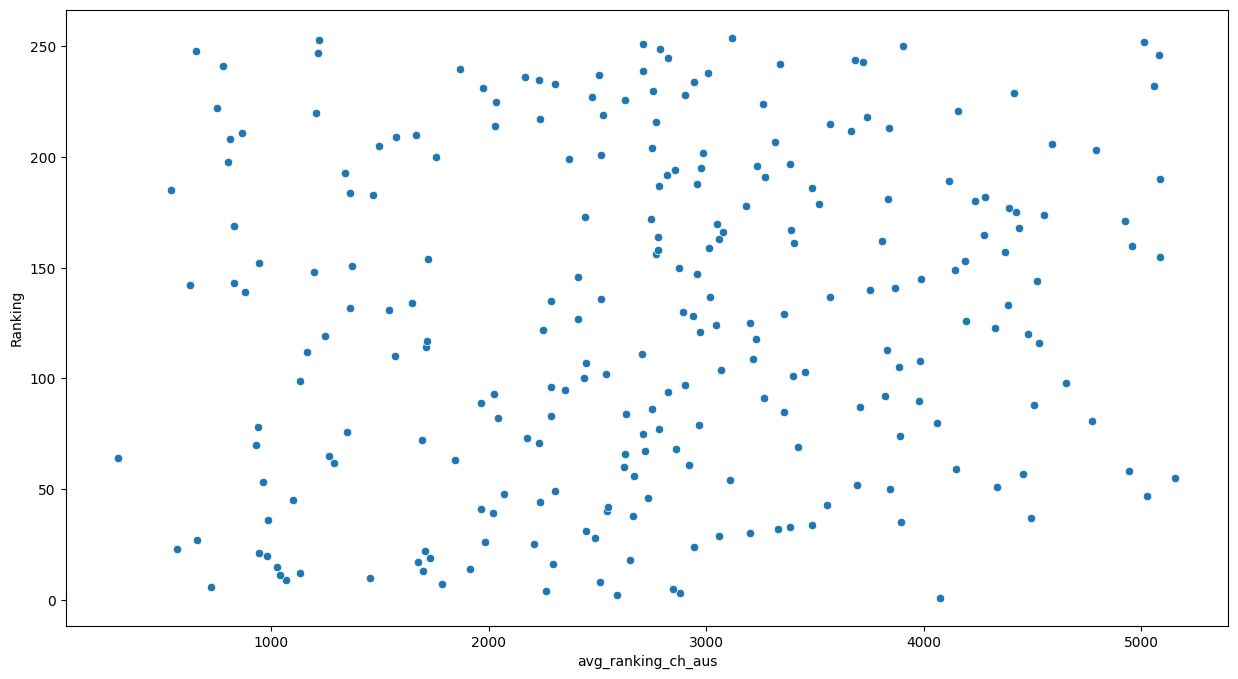

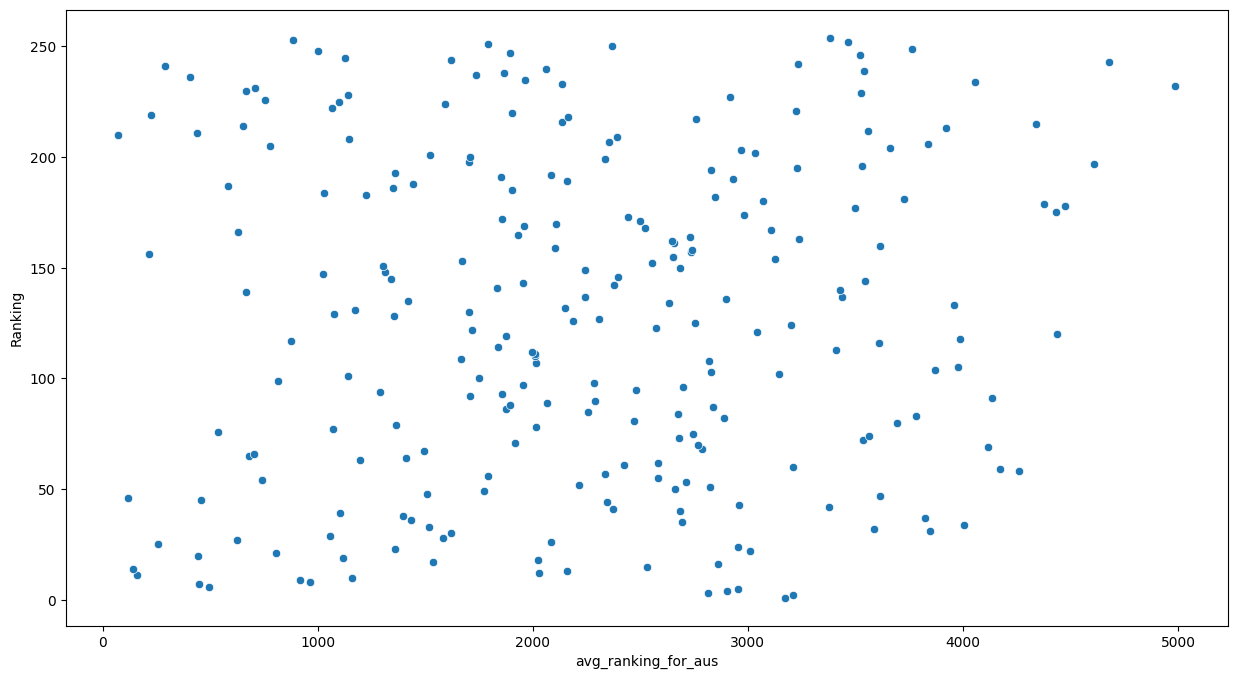

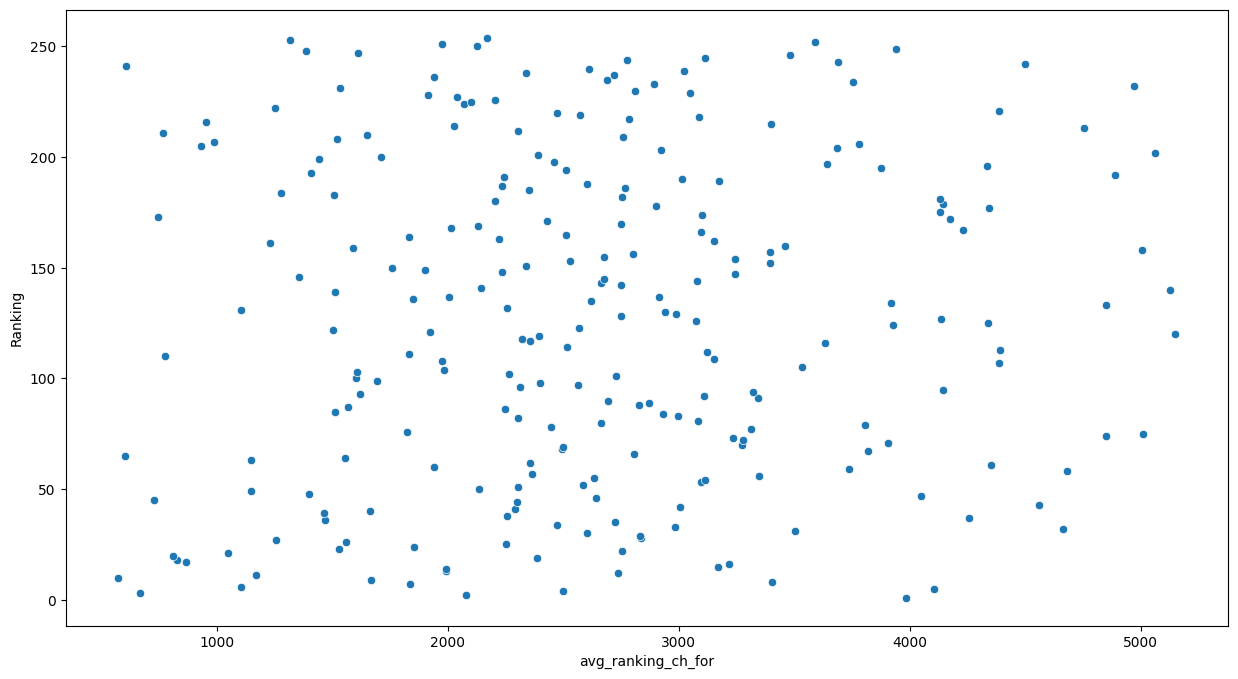

In [15]:
#Inner join das tabelas gold de carga horária e ausências e a média de seus respectivos rankings
sql_query = ('''Select a.codesc, a.Ranking, (bigquery_infnet.string_treatment(a.Ranking_CargaHoraria) + bigquery_infnet.string_treatment(b.Ranking_Ausencia))/2 as avg_ranking_ch_aus 
From `midyear-courage-360821.bigquery_infnet.gold_carga_horaria` a inner join `midyear-courage-360821.bigquery_infnet.gold_ausencias` b On a.codesc = b.codesc order by cast(a.Ranking as numeric) limit 250;
''')
df_ranking_ch_aus = client.query(sql_query).to_dataframe()

df_ranking_ch_aus["Ranking"] = pd.to_numeric(df_ranking_ch_aus["Ranking"])
df_ranking_ch_aus["avg_ranking_ch_aus"] = pd.to_numeric(df_ranking_ch_aus["avg_ranking_ch_aus"])

df_ranking_ch_aus = df_ranking_ch_aus[["avg_ranking_ch_aus","Ranking"]]
plt.figure(figsize = (15, 8))
sns.scatterplot(x = df_ranking_ch_aus["avg_ranking_ch_aus"], y = df_ranking_ch_aus["Ranking"] ).set(title='Comparação entre nota Saresp e a conjunção de Carga Horária e Ausências')

#Inner join das tabelas gold de carga horária e ausências e a média de seus respectivos rankings
sql_query = ('''Select a.codesc, a.Ranking, (bigquery_infnet.string_treatment(a.Ranking_formacao) + bigquery_infnet.string_treatment(b.Ranking_Ausencia))/2 as avg_ranking_for_aus 
From `midyear-courage-360821.bigquery_infnet.gold_formacao` a inner join `midyear-courage-360821.bigquery_infnet.gold_ausencias` b On a.codesc = b.codesc order by cast(a.Ranking as numeric) limit 250;
''')
df_ranking_for_aus = client.query(sql_query).to_dataframe()


df_ranking_for_aus["Ranking"] = pd.to_numeric(df_ranking_for_aus["Ranking"])
df_ranking_for_aus["avg_ranking_for_aus"] = pd.to_numeric(df_ranking_for_aus["avg_ranking_for_aus"])

df_ranking_for_aus = df_ranking_for_aus[["avg_ranking_for_aus","Ranking"]]
plt.figure(figsize = (15, 8))
sns.scatterplot(x = df_ranking_for_aus["avg_ranking_for_aus"], y = df_ranking_for_aus["Ranking"] ).set(title='Comparação entre nota Saresp e a conjunção de Formação e Ausências')

#Inner join das tabelas gold de carga horária e ausências e a média de seus respectivos rankings
sql_query = ('''Select a.codesc, a.Ranking, (bigquery_infnet.string_treatment(a.Ranking_formacao) + bigquery_infnet.string_treatment(b.Ranking_CargaHoraria))/2 as avg_ranking_ch_for 
From `midyear-courage-360821.bigquery_infnet.gold_formacao` a inner join `midyear-courage-360821.bigquery_infnet.gold_carga_horaria` b On a.codesc = b.codesc order by cast(a.Ranking as numeric) limit 250;
''')
df_ranking_ch_for = client.query(sql_query).to_dataframe()


df_ranking_ch_for["Ranking"] = pd.to_numeric(df_ranking_ch_for["Ranking"])
df_ranking_ch_for["avg_ranking_ch_for"] = pd.to_numeric(df_ranking_ch_for["avg_ranking_ch_for"])

df_ranking_ch_for = df_ranking_ch_for[["avg_ranking_ch_for","Ranking"]]
plt.figure(figsize = (15, 8))
sns.scatterplot(x = df_ranking_ch_for["avg_ranking_ch_for"], y = df_ranking_ch_for["Ranking"] ).set(title='Comparação entre nota Saresp e a conjunção de Carga Horária e Formação')

###[ 17 ] Por fim, escreva um texto em seu relatório fazendo uma análise final, tendo em vista os resultados obtidos. Responda às perguntas que fez no início do exercício e discuta se sua hipótese foi confirmada ou refutada


A análise empírica dos desempenhos escolares a partir das notas do SARESP, tal como feita aqui, foi capaz de evidenciar o quanto a educação é um tema complexo, e para além disso, como não existem fórmulas ao se educar. Mesmo quando cruzamos dados de avaliação das escolas com menos faltas de servidores, de maior formação dos servidores ou de maior carga horária em aula, nenhum desses fatores conseguiu ser determinante, ou mesmo estar presente em alguns casos. Ainda que correlacionados, nenhum padrão aparente se mostra relevante para uma análise final. Abaixo, uma última análise que cruza todos os atributos foi feita abaixo e apenas comprova o fato. A escola de maior média não está entre as primeiras 2500 em nenhum dos fatores elencados acima. Por mais que tentemos extrair dados da prática educacional, talvez sejam fatores externos os que principalmente influenciem, e que não encontram-se aqui nessa pesquisa. O número de alunos por sala de aula por exemplo pode ser mais importante que o tempo de formação do professor, a participação dos pais e da comunidade podem ser mais influentes que o número de ausências dos servidores. Uma análise final não poderia ser feita sem considerar esses atributos, e evidenciar que não há um caminho sem dados mais amplos e que não existem tendências simples quando se fala de educação pública, talvez seja a maior virtude dessa presente análise. 

In [17]:
sql_query = ('''Select a.codesc, a.Ranking, a.Ranking_formacao, b.Ranking_CargaHoraria, c.Ranking_Ausencia
From `midyear-courage-360821.bigquery_infnet.gold_formacao` a inner join `midyear-courage-360821.bigquery_infnet.gold_carga_horaria` b On a.codesc = b.codesc 
inner join `midyear-courage-360821.bigquery_infnet.gold_ausencias` c on a.codesc = c.codesc 
order by cast(a.Ranking as numeric) limit 20;
''')
df_all = client.query(sql_query).to_dataframe()
df_all.head(10)

,codesc,Ranking,Ranking_formacao,Ranking_CargaHoraria,Ranking_Ausencia
0,24211,1,3086,4884,3264
1,462378,2,2700,1457,3720
2,496376,3,601,729,5030
3,578587,4,3139,1862,2663
4,24314,5,4214,3999,1695
5,497381,6,873,1338,113
6,13390,7,493,3176,400
7,29178,8,1857,4949,74
8,496479,9,1517,1820,320
9,18326,10,279,869,2038
